# 통계세미나
- 전북대 통계학과 석사과정 이민우

`-` 발표내용
- distance measure
  - lookstep measure
    - Minkowski distance
    - Pearson correlation
  - elastic measure
    - Dynamic Time Warping(DTW)
    - Longest Common Subsequence (LCSS)
---

# 1. Lookstep measure

- one to one
- equal length

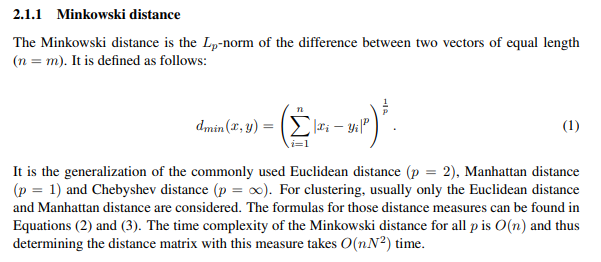

- 위의 식은 유클리디안 거리를 일반화한 식이다
- p = 1인 경우, Manhattan distance
- p가 무한인 경우 Chebyshev distance
- $O(nN^2)$ 계산의 복잡도

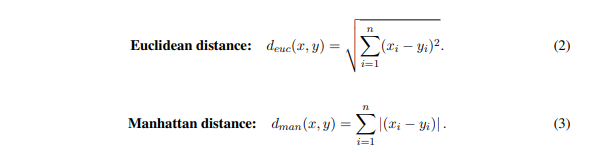
---

---

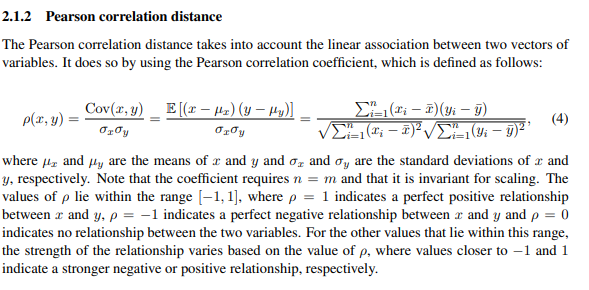

- $\rho$ 의 범위는 -1에서 1사이
-  $\rho=1$은 perfect positive relationship
-  $\rho=-1$은 perfect negative relationship 

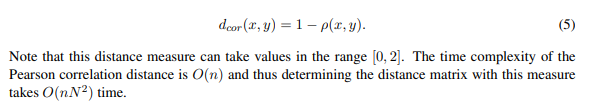

- 양의 상관관계가 강할수록 -> 0
- 음의 상관관계가 강할수록 -> 2

`-` Minkowski distance와 pearson correlation distance의 차이?
- 해당 변수들이 지닌 분포를 고려하냐 고려하지 않느냐
- 즉 Minkowski distance는 가까울 수 있어도 두 변수가 서로 비선형적일수록 상관관계는 낮게 뜰 것이고
- 반대로 Minkowski distance가 멀어도 두 변수가 어떤 요인에서라든지 같이 증가하고 같이 감소한다라면 상관관계는 높게 뜰 것

---
### cos(t)과 2.5sin(t)중에 무엇이 sin(t)와 더 가까울까?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
t = np.arange(0,100,1)
sin= np.sin(t)
cos= np.cos(t)

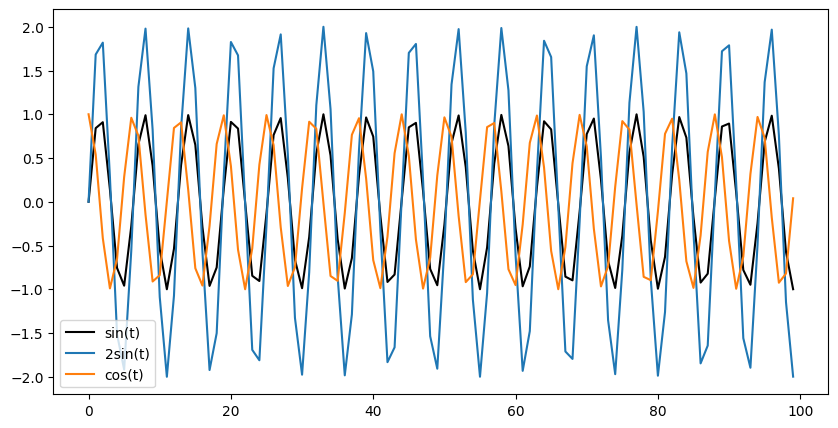

In [68]:
plt.figure(figsize=(10,5))
plt.plot(t,np.sin(t),label='sin(t)',c='black')
#plt.plot(t,np.sin(t)+0.1,label='sin+0.1')
#plt.plot(t,np.sin(t)+0.5,label='sin+0.5')
plt.plot(t,np.sin(t)*2,label='2sin(t)')

plt.plot(t,np.cos(t),label='cos(t)')
plt.legend()
plt.show()

In [41]:
print('d(sin,cos) : ',np.sqrt(sum((sin - cos)**2)), sum(np.abs((sin - cos))))

d(sin,cos) :  9.969890413027315 89.47276307323035


In [5]:
for i in np.arange(2,3.1,0.1):
    print(f'd(sin,{i.round(2)}sin) : ',np.sqrt(sum((sin - sin*i)**2)).round(5), sum(np.abs((sin - sin*i))).round(5))

d(sin,2.0sin) :  7.07191 63.47727
d(sin,2.1sin) :  7.77911 69.825
d(sin,2.2sin) :  8.4863 76.17273
d(sin,2.3sin) :  9.19349 82.52045
d(sin,2.4sin) :  9.90068 88.86818
d(sin,2.5sin) :  10.60787 95.21591
d(sin,2.6sin) :  11.31506 101.56363
d(sin,2.7sin) :  12.02226 107.91136
d(sin,2.8sin) :  12.72945 114.25909
d(sin,2.9sin) :  13.43664 120.60682
d(sin,3.0sin) :  14.14383 126.95454


`-` sin(t)에 몇배를 해야 cos(t)보다 거리가 멀어질까?

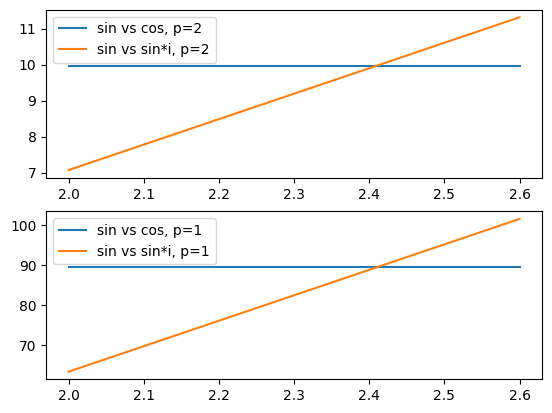

In [66]:

x = np.arange(2, 2.6, 0.1)
y1 = [np.sqrt(np.sum((sin - cos)**2)) for i in range(7)]
y2 = [np.sqrt(np.sum((sin - sin*i)**2)).round(5) for i in x]
z1 = [ sum(np.abs((sin - cos))) for i in range(7)]
z2 = [ sum(np.abs((sin - sin*i)))for i in x]

fig, ax = plt.subplots(2,1)

ax[0].plot(x, y1, label='sin vs cos, p=2')
ax[0].plot(x, y2, label='sin vs sin*i, p=2')

ax[1].plot(x, z1, label='sin vs cos, p=1')
ax[1].plot(x, z2, label='sin vs sin*i, p=1')

ax[0].legend()
ax[1].legend()
plt.show()


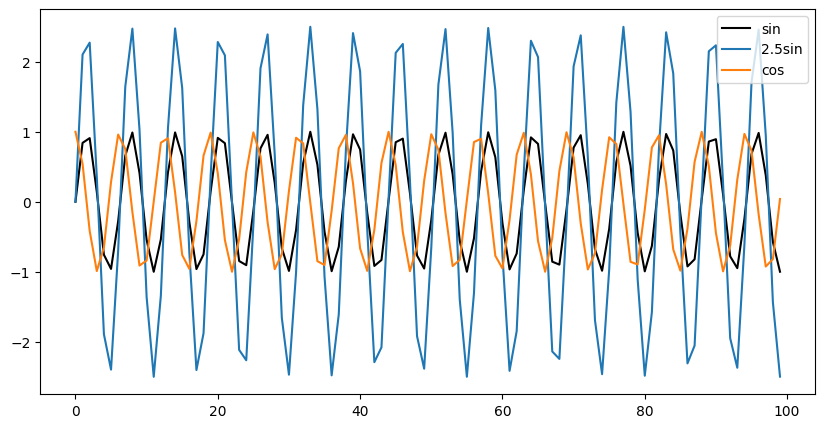

In [40]:
plt.figure(figsize=(10,5))
plt.plot(t,np.sin(t),label='sin',c='black')
#plt.plot(t,np.sin(t)+0.1,label='sin+0.1')
plt.plot(t,2.5*np.sin(t),label='2.5sin')
plt.plot(t,np.cos(t),label='cos')
plt.legend()
plt.show()

### 상관관계에 따른 거리

In [7]:
print('$d_{corr}(sin,cos)$ : ',1 - np.corrcoef(sin, cos)[1,0])
print('$d_{corr}(sin,2sin)$ : ',1- np.corrcoef(sin, 2*sin)[1,0])

$d_{corr}(sin,cos)$ :  0.9939570407063694
$d_{corr}(sin,2sin)$ :  0.0


`-` t가 given 일때, sin(t)와 2sin(t)의 상관관계가 1인 것은 당연함
$$
\frac{Cov(sin(X),2sin(X))}{\sqrt{Var(sin(X))}\sqrt {Var(2sin(X))}} =
$$
$$
\frac{2Cov(sin(X),sin(X))}{\sqrt{Var(sin(X))}\sqrt {4Var(sin(X))}} =
$$
$$
\frac{2Var(sin(X))}{\sqrt{4Var(sin(x))^2}} = 1
$$



---
### 대한민국 일사량에 대한 기온과 전력 간의 거리


In [8]:
ele= pd.read_csv("data/ele_val_output_7.csv").iloc[:7,1:].values.flatten()
tem=pd.read_csv("data/tem_val_output_7.csv").iloc[:7,1:].values.flatten()
solor =pd.read_csv("data/solor_val_output_7.csv").iloc[:7,1:].values.flatten()

df = pd.DataFrame({'ele':ele,
             'tem':tem,
             'solor':solor})
ele.shape, tem.shape, solor.shape

((168,), (168,), (168,))

In [9]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
scale = pd.DataFrame(minmax.fit_transform(df))
scale.columns = ['ele','tem','solar']

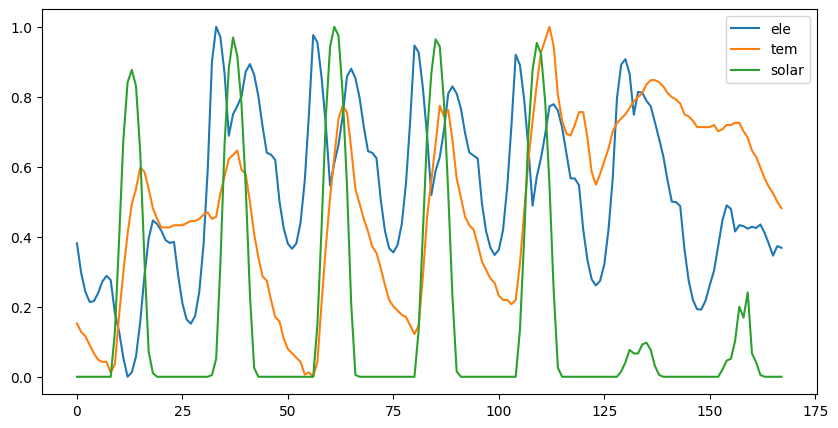

In [39]:
scale.plot(figsize=(10,5))
plt.show()

In [11]:
print('corr(solar, tem) : ',np.sqrt(sum((solor - tem)**2)).round(2) , sum(np.abs(solor-tem)).round(2))
print('corr(solar, ele) : ',np.sqrt(sum((solor - ele)**2)).round(2) , sum(np.abs(solor-ele)).round(2))
print('corr(tem, ele) : ',np.sqrt(sum((tem- ele)**2)).round(2) , sum(np.abs(tem-ele)).round(2))


corr(solar, tem) :  71.61 789.64
corr(solar, ele) :  921955.64 11891129.08
corr(tem, ele) :  921905.29 11890483.9


### 상관관계

In [12]:
print('corr(solar, tem) : ',1 - np.corrcoef(solor, tem)[1,0])
print('corr(solar, ele) : ',1 - np.corrcoef(solor, ele)[1,0])
print('corr(tem, ele) : ',1 - np.corrcoef(tem, ele)[1,0])

corr(solar, tem) :  0.7103978287785134
corr(solar, ele) :  0.8644582701576197
corr(tem, ele) :  0.8249419583697262


- 일사량과 기온이 거리가 더 가깝다
- 태양 복사열이 높을 수록 기온이 높아질테니.. 어찌보면 당연한 것

---
# 2. Elastic measure

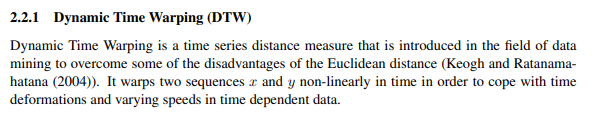

- one to many, one to none
- 시간 종속성에 따라 데이터의 변형과 다양한 속도에 대처하기 때문에 x와 y는 비선형적으로 Warp된다

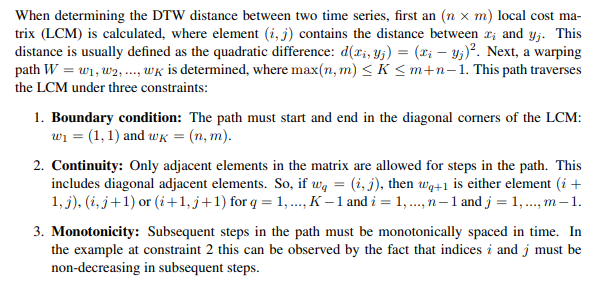

1. $x_i,y_i$ 에 따른 LCM(local cost matrix) 계산
- $d(x_i-y_i)=(x_i-y_i)^2$

2. 세가지의 규칙

   - 경계선 조건 : 항상 시작은 행렬의 좌상단에서 끝은 우하단
   - 지속성 : 연속적으로 이어져야한다. 점프 같은 것 없음
   - 단조성 : 뒤로 후퇴하는 것이 불가능, 시간의 흐름처럼 방향은 고정되어 있다.

In [13]:
print('w1 : ',sin[0],cos[0],)
print('wk : ',sin[-1],cos[-1])

w1 :  0.0 1.0
wk :  -0.9992068341863537 0.0398208803931389


In [14]:
print('w2 : ',sin[0+1],cos[0])
print('w2 : ',sin[0],cos[0+1])
print('w2 : ',sin[0+1],cos[0+1])


w2 :  0.8414709848078965 1.0
w2 :  0.0 0.5403023058681398
w2 :  0.8414709848078965 0.5403023058681398


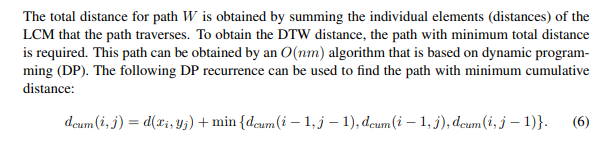

In [23]:
(sin[0]-cos[0])**2+min((sin[0+1]-cos[0])**2 , (sin[0]-cos[0+1])**2, (sin[0+1]-cos[0+1])**2)

1.0251314486577783

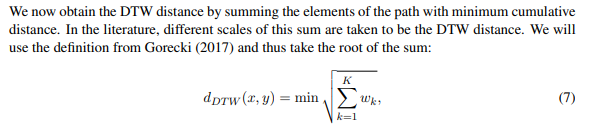

In [16]:
#import dtw
from dtw import *
def calculate_dtw(series1, series2):
    # DTW 유사도 계산
    dtw_result = dtw(series1, series2, keep_internals=True)
    return dtw_result  


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



`-` sin(x)와 cos(x)의 DTW

In [17]:
d=calculate_dtw(sin.reshape(1,-1),cos.reshape(1,-1))
d.distance

15.405742450800199

`-` sin(x)와 2sin(x)의 DTW

In [26]:
d=calculate_dtw(sin.reshape(1,-1),2*sin.reshape(1,-1))
d.distance

102.59291740265267

`-` 일사량 기준 전력과 기온 DTW

In [19]:
a1= calculate_dtw(tem,solor)
print(a1.distance)
a1= calculate_dtw(ele,solor)
print(a1.distance)

793.4600000000014
21025361.08


---

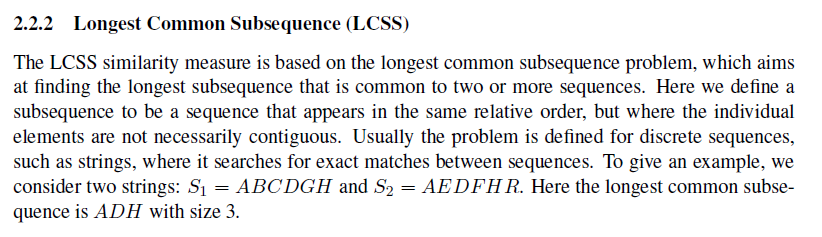

- LCSS는 어떤 두개의 데이터간의 가장 길이가 긴 공통된 연속체를 찾는 문제에 기초를 두고 있다.
- 가장 길이가 긴 공통된 연속체는 동일한 순서를 지니지만 무조건 연속적이지 않다 
- 보통 이산적인 글자 같은 경우

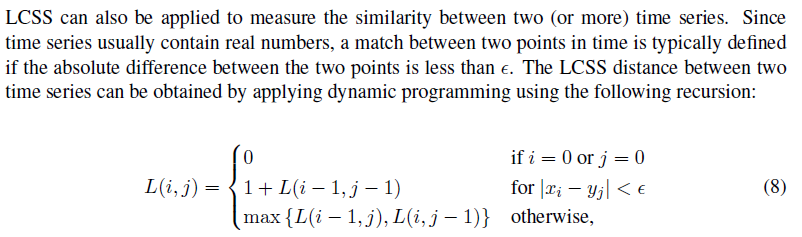

- 두 시계열간의 유사도를 측정하는 것
- 시계열의 순서가 0인 경우에 0으로 바꿈
- 두 시계열의 값의 차이가 어떠한 $\epsilon$보다 작은 경우 대각의 놓인 -1 시점의 값에 1을 더함
- 그 외의 경우에는 매트릭스의 바로 위나 왼쪽의 MAX값을 취함

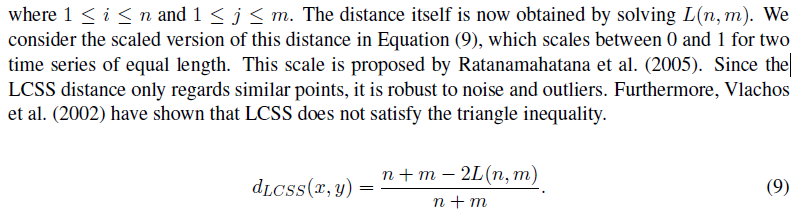

- $L(n,m)$을 이용해 거리를 얻을 수 있다
- 1과 0사이 값을 가지며 이상치와 잡음에 강건한 성질이 있음
- $n \ne m$일 때, $L(n,m)=min(n,m)$, $d_{LCSS}$는 0이 나오기 힘듦 -> 즉 거리가 다른 두 시계열은 완벽하게 유사하지 않다는 것!
- $n = m$일 때, $d_{LCSS}$는 0이 나올 수 있다.

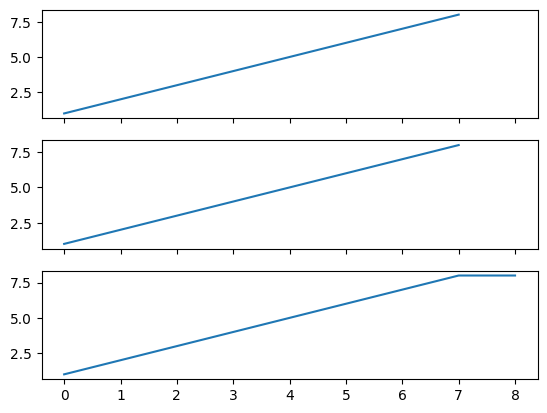

0.0
0.058823529411764705


In [38]:
ts1 = np.array([1, 2, 3, 4, 5, 6, 7, 8])
ts2 = np.array([1, 2, 3, 4, 5, 6, 7, 8])
ts3 = np.array([1, 2, 3, 4, 5, 6, 7, 8,8])

def lcss(ts1, ts2, epsilon, delta):
    """
    LCSS(Longest Common Subsequence) 알고리즘을 두 타임 시리즈에 적용
    :param ts1: 첫 번째 타임 시리즈
    :param ts2: 두 번째 타임 시리즈
    :param epsilon: 두 값이 유사하다고 간주되는 허용 오차
    :param delta: 시간차 허용 범위
    :return: LCSS 유사도 값
    """
    n, m = len(ts1), len(ts2)
    dp = np.zeros((n+1, m+1))  # 동적 계획법 테이블
    
    for i in range(1, n+1):
        for j in range(max(1, i - delta), min(m+1, i + delta)):
            if abs(ts1[i-1] - ts2[j-1]) < epsilon:
                dp[i][j] = dp[i-1][j-1] + 1  # 공통 부분 시퀀스 연장
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])  # 최장 공통 시퀀스 선택
    
    # 최종 LCSS 길이를 이용해 유사도 계산 (정규화)
    lcss_length = dp[n][m]
    
    # 수정된 정규화: 두 타임 시퀀스 길이를 합한 값으로 나누기
    similarity = (n + m - 2 * lcss_length) / (n + m)
    return similarity

# 허용 오차 및 시간차 설정
epsilon = 1  # 값 차이가 1 이하일 때 유사한 것으로 간주
delta = 10    # 시간차는 최대 1

# LCSS 유사도 계산
fig, ax = plt.subplots(3,1, sharex=True)
ax[0].plot(ts1)
ax[1].plot(ts2)
ax[2].plot(ts3)
plt.show()
print(lcss(ts1, ts2, epsilon, delta))
print(lcss(ts1, ts3, epsilon, delta))


`-` 일사량에 따른 전력과 기온의 관계는?

In [80]:
print(lcss(solor, ele, 0.5, 24))
print(lcss(solor, tem, 0.5, 24))


1.0
0.8630952380952381


---

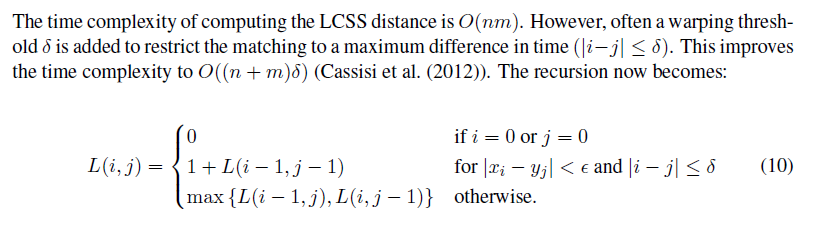

- 기존 LCSS의 거리 계산의 time complexity는 $O(nm)$이지만 쓰레드 홀드를 통해 time complexity를 개선할 수 있다.
- 또한 시점이 멀고 가깝냐도 고려한다는 것으로 보인다.
- 예를 들어 기온과 일사량에 관계에서 2000일전의 기온이 현재 시점의 일사량과 크리티컬한 관계가 있을까?
- 따라서 시점이 먼 데이터는 굳이 계산하지 않겠다는 것으로 해석

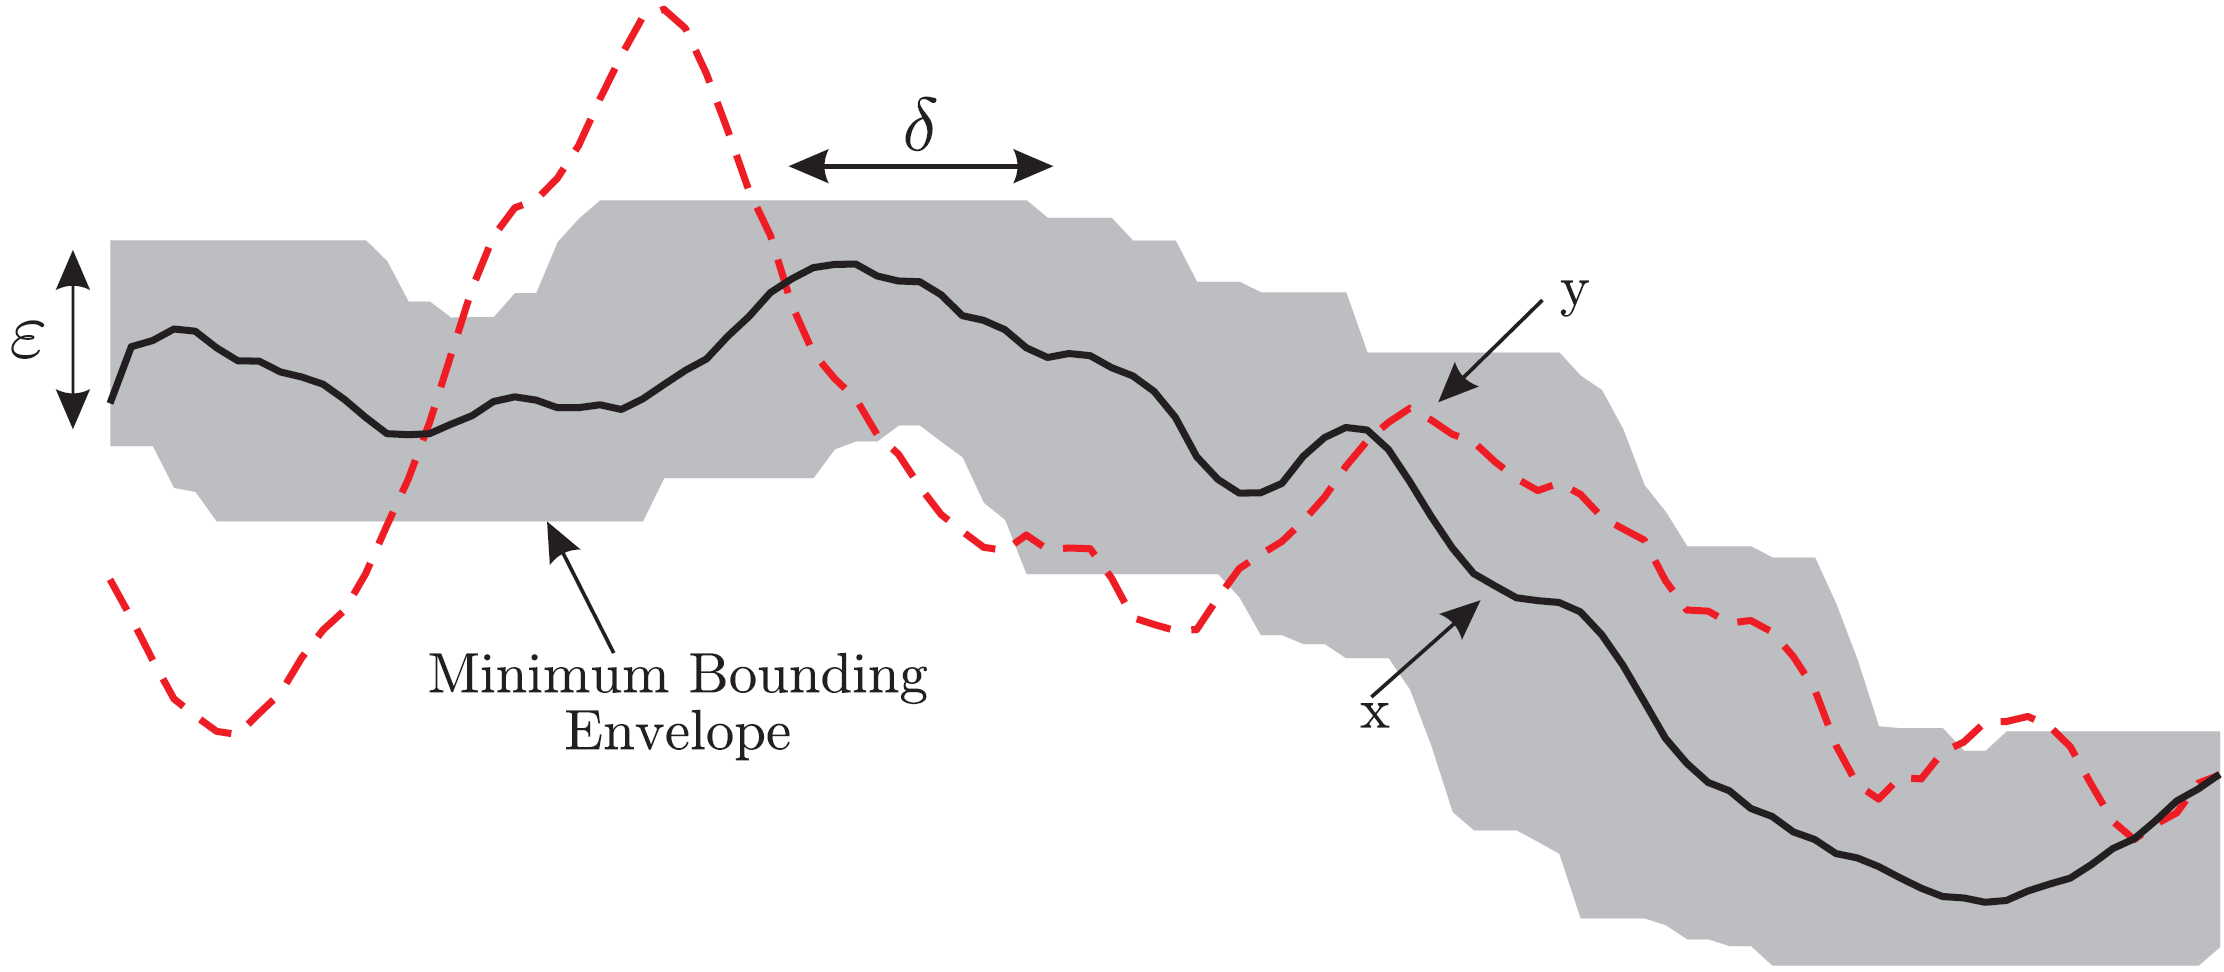